# K-Nearest Neighbors (K-NN)

**author** : Germain Forestier (germain.forestier@uha.fr)

The k-Nearest Neighbors (k-NN) algorithm is a type of instance-based learning used for classification and regression. The algorithm takes a data point and looks at the 'k' closest labeled data points. The data point is then assigned the label most common among its 'k' nearest neighbors.


## **Exercise 1**: Implementing 1-NN from Scratch

In this exercise, you will build a 1-Nearest Neighbor (1-NN) classifier step by step. Let's start by understanding the dataset and defining some foundational functions.


### Part 1: Load a Simple Dataset

Load the Iris dataset into variables `X` and `y`.


In [ ]:
# Your code here to load the Iris dataset


 #### Correction :

In [ ]:
from sklearn.datasets import load_iris

# Load the Iris dataset
X, y = load_iris(return_X_y=True)


### Part 2: Compute the Euclidean Distance

Write a function to calculate the Euclidean distance between two points.


In [ ]:
def euclidean_distance(point1, point2):
    # Your code here to compute the Euclidean distance
    pass


 #### Correction :

In [ ]:
import numpy as np

def euclidean_distance(point1, point2):
    # Compute the Euclidean distance
    return np.sqrt(np.sum((point1 - point2) ** 2))


### Part 3: Implement 1-NN

Write a function to classify a given point using 1-NN on the training data.


In [ ]:
def one_nn_classify(training_data, training_labels, test_point):
    # Compute distances to all points in the training data
    # Find the index of the closest point
    # Return the label of the nearest neighbor
    pass


 #### Correction :

In [ ]:
def one_nn_classify(training_data, training_labels, test_point):
    # Compute distances to all points in the training data
    distances = [euclidean_distance(test_point, point) for point in training_data]

    # Find the index of the closest point
    nearest_neighbor_idx = np.argmin(distances)

    # Return the label of the nearest neighbor
    return training_labels[nearest_neighbor_idx]


### Part 4: Predicting and Evaluating

Now, let's test the 1-NN implementation by splitting the dataset into training and testing sets, predicting the labels for the test set, and evaluating the accuracy.


#### Step 1: Split the Data

Split the dataset into training and testing sets. Use 80% for training and 20% for testing.


In [ ]:
# Your code here to split the data into training and testing sets


 ##### Correction :

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Step 2: Predicting Labels

Use the `one_nn_classify` function you implemented to predict the labels for the test set.


In [ ]:
# Your code here to predict the labels for the test set


 ##### Correction :

In [ ]:
# Predict the labels for the test set
y_pred = [one_nn_classify(X_train, y_train, point) for point in X_test]


#### Step 3: Evaluating the Accuracy

Compute the accuracy of your 1-NN model on the test set.


In [ ]:
# Your code here to evaluate the accuracy


 ##### Correction :

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy of the 1-NN model:", accuracy)


Accuracy of the 1-NN model: 1.0


## **Exercise 2**: Using k-NN with sklearn

The k-Nearest Neighbors (k-NN) algorithm is available in the `sklearn` library, making it easy to use this algorithm without having to implement it from scratch. In this section, we'll explore how to use `sklearn` to create and evaluate a k-NN model.


### Step 1: Importing and Initializing the k-NN Classifier

The `KNeighborsClassifier` class in `sklearn.neighbors` is used to create a k-NN classification model. Let's start by importing this class and initializing it with `k=3`.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize the k-NN classifier with k=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)


### Step 2: Training the Model

Now, let's train the k-NN model using the training data from the previous exercise.


In [ ]:
# Train the k-NN model
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

### Step 3: Predicting and Evaluating

We'll use the trained k-NN model to predict the labels for the test set and evaluate its accuracy.


In [ ]:
# Predict the labels for the test set
knn_y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy of the k-NN model with k=3:", knn_accuracy)


Accuracy of the k-NN model with k=3: 1.0


## **Exercise 3**: Image Classification with k-NN

In this exercise, we'll explore the k-NN algorithm using an image dataset. We'll use the handwritten digits dataset from `sklearn`, which consists of 8x8 pixel images of handwritten digits (0-9). Let's


### Step 1: Loading and Visualizing the Handwritten Digits Dataset

Load the dataset and display the first few images to understand what they look like.


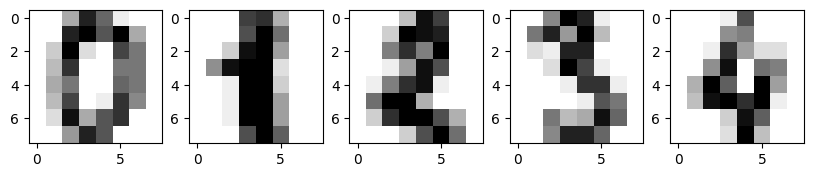

In [ ]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt

# Load the digits dataset
digits = load_digits()

# Display the first few images
fig, axes = plt.subplots(1, 5, figsize=(10, 4))
for ax, image in zip(axes, digits.images):
    ax.imshow(image, cmap=plt.cm.gray_r)
plt.show()


### Step 2: Implementing k-NN

Split the data into training and testing sets and train a k-NN classifier using `sklearn`. We'll use `k=5` for this exercise.


In [ ]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.2, random_state=42)

# Initialize and train the k-NN classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)


KNeighborsClassifier()

### Step 3: Visualizing the Neighbors

Choose a sample image from the test set and visualize its 5 nearest neighbors from the training set using the k-NN model.


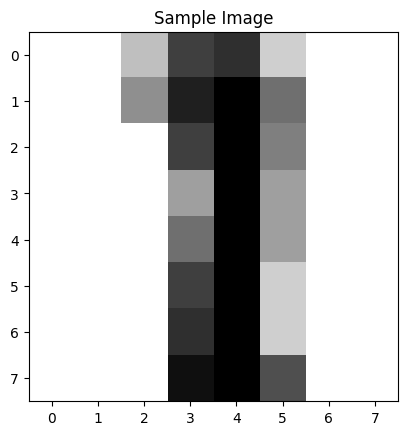

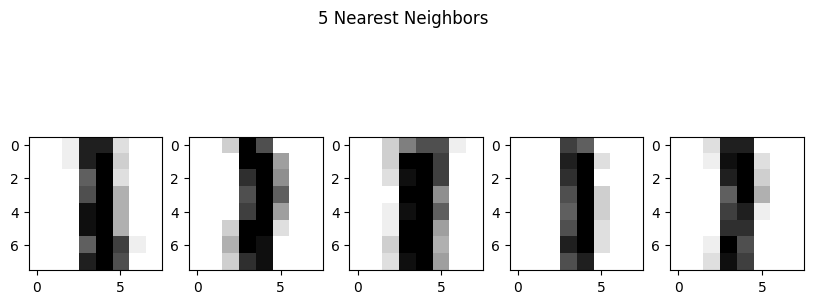

In [ ]:
import numpy as np

# Select a sample from the test set
sample_index = 10
sample_image = X_test[sample_index].reshape(1, -1)

# Find the indices of the 5 nearest neighbors from the training set
neighbors_indices = knn_classifier.kneighbors(sample_image, n_neighbors=5, return_distance=False)

# Display the sample image
plt.imshow(sample_image.reshape(8, 8), cmap=plt.cm.gray_r)
plt.title("Sample Image")
plt.show()

# Display the 5 nearest neighbors
fig, axes = plt.subplots(1, 5, figsize=(10, 4))
for ax, neighbor_idx in zip(axes, neighbors_indices[0]):
    ax.imshow(X_train[neighbor_idx].reshape(8, 8), cmap=plt.cm.gray_r)
plt.suptitle("5 Nearest Neighbors")
plt.show()


### Step 4: Evaluating the k-NN Classifier

Evaluate the k-NN classifier on the test set to determine its accuracy. This will give us a measure of how well the


In [ ]:
# Predict the labels for the test set
knn_y_pred = knn_classifier.predict(X_test)

# Evaluate the accuracy
knn_accuracy = accuracy_score(y_test, knn_y_pred)
print("Accuracy of the k-NN model with k=5:", knn_accuracy)


Accuracy of the k-NN model with k=5: 0.9861111111111112


## **Exercise 4**: Searching for the Best k in k-NN

In this exercise, we'll explore how the choice of `k` affects the accuracy of the k-NN classifier. We'll evaluate the model for different values of `k`, record the accuracies, and visualize the results to identify the best `k`. Let's start by defining a range of `k` values and initializing a list to store the accuracies.


### Step 1: Defining k Values and Initializing Accuracy List

Define a range of `k` values to test (e.g., from 1 to 20) and initialize an empty list to store the accuracy for each `k`.


In [ ]:
# Define a range of k values and initialize a list to store accuracies
k_values = ...
accuracies = ...


 #### Correction :

In [ ]:
# Define a range of k values and initialize a list to store accuracies
k_values = range(1, 21)
accuracies = []


### Step 2: Evaluating the k-NN Model for Different k

Create a loop to iterate through the `k` values. For each `k`, train a k-NN model, evaluate its accuracy on the test set, and append the accuracy to the list.


In [ ]:
# Iterate through the k values, train a k-NN model, and record the accuracy
for k in k_values:
    knn_classifier = ...
    knn_classifier.fit(...)
    knn_y_pred = ...
    accuracy = ...
    accuracies.append(...)


 #### Correction :

In [ ]:
# Iterate through the k values, train a k-NN model, and record the accuracy
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    knn_y_pred = knn_classifier.predict(X_test)
    accuracy = accuracy_score(y_test, knn_y_pred)
    accuracies.append(accuracy)


### Step 3: Visualizing the Results

Plot the accuracies as a line chart against the `k` values to visualize how the accuracy changes with different values of `k`.


In [ ]:
# Plot the accuracies against the k values
plt.plot(...)
plt.xlabel(...)
plt.ylabel(...)
plt.title(...)
plt.show()


 #### Correction :

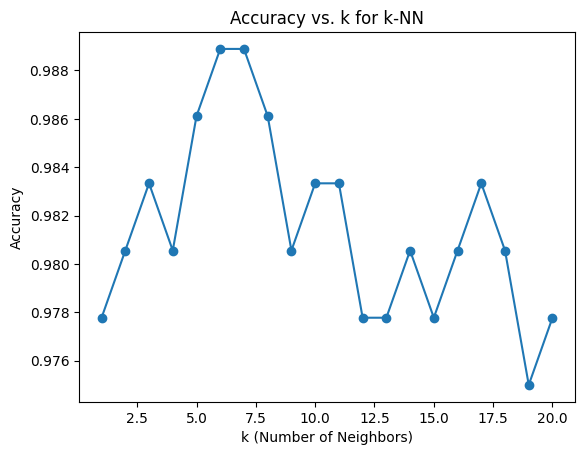

In [ ]:
# Plot the accuracies against the k values
plt.plot(k_values, accuracies, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. k for k-NN')
plt.show()


## **Exercise 5**: Implementing and Comparing Weighted k-NN with Regular k-NN

Fashion MNIST is a dataset of Zalando's article images, with 28x28 grayscale images of 10 fashion categories. Let's use this dataset to explore the potential differences in performance between the regular k-NN and its weighted counterpart.


### Step 1: Loading the Fashion MNIST Dataset

Load the Fashion MNIST dataset and split it into training and testing sets. Display a few sample images to get a sense of the data.


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


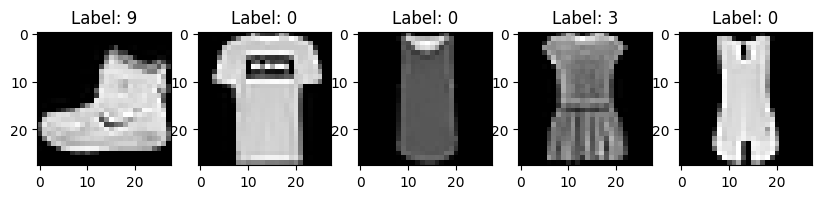

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

# Load the Fashion MNIST dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Flatten the images
X_train = X_train.reshape(X_train.shape[0], 28*28)
X_test = X_test.reshape(X_test.shape[0], 28*28)

# Display the first 5 images from the training set
plt.figure(figsize=(10, 10))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
plt.show()


### Step 2: Implementing Weighted k-NN

Now, let's apply the `KNeighborsClassifier` with the `weights` parameter set to 'distance'. Choose a value for `k`, like 5, and evaluate the classifier's performance on a subset of the test data.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Weighted k-NN
k_weighted = 5
knn_weighted = KNeighborsClassifier(n_neighbors=k_weighted, weights=...)
knn_weighted.fit(...)

# Predicting on a subset to save time
y_pred_weighted = ...
accuracy_weighted = ...
print("Accuracy with weighted k-NN:", accuracy_weighted)


 #### Correction :

In [ ]:
# Weighted k-NN
k_weighted = 5
knn_weighted = KNeighborsClassifier(n_neighbors=k_weighted, weights='distance')
knn_weighted.fit(X_train[:10000], y_train[:10000])  # Using a subset to save time
y_pred_weighted = knn_weighted.predict(X_test[:1000])  # Predict on a subset
accuracy_weighted = accuracy_score(y_test[:1000], y_pred_weighted)
print("Accuracy with weighted k-NN:", accuracy_weighted)


Accuracy with weighted k-NN: 0.833


### Step 3: Implementing Regular k-NN

It's time to try the regular k-NN. Train the classifier using the same `k` value and evaluate its performance on the same subset of the test data.


In [ ]:
# Regular k-NN
k_regular = 5
knn_regular = KNeighborsClassifier(n_neighbors=k_regular, weights=...)
knn_regular.fit(...)

y_pred_regular = ...
accuracy_regular = ...
print("Accuracy with regular k-NN:", accuracy_regular)


 #### Correction :

In [ ]:
# Regular k-NN
k_regular = 5
knn_regular = KNeighborsClassifier(n_neighbors=k_regular, weights='uniform')
knn_regular.fit(X_train[:10000], y_train[:10000])  # Using a subset to save time
y_pred_regular = knn_regular.predict(X_test[:1000])  # Predict on a subset
accuracy_regular = accuracy_score(y_test[:1000], y_pred_regular)
print("Accuracy with regular k-NN:", accuracy_regular)


Accuracy with regular k-NN: 0.836


### Step 4: Discussion

With the results:

1. Contrast the accuracies of weighted and regular k-NN. Do you notice any differences?
2. Why might weighting neighbors by distance affect results on this dataset?
3. Contemplate scenarios where weighted distances could be beneficial.

Reflect on the findings and capture your observations. A deeper understanding can be achieved through further experimentation.


## **Exercise 6**: Visualizing k-NN Decision Boundaries

Understanding how a classifier distinguishes between classes can offer deep insights into its functioning and decision-making process. In this exercise, we'll explore the decision boundaries formed by the k-NN algorithm using the Iris dataset.


### Step 1: Dataset and Setup

We'll use the Iris dataset but only focus on two features to keep our visualization in two dimensions. Begin by loading the necessary libraries and the dataset.


In [ ]:
from sklearn import datasets
import matplotlib.pyplot as plt
import numpy as np

# Load iris dataset
iris = datasets.load_iris()
# We'll only take the first two features for visualization.
X = iris.data[:, :2]
y = iris.target


### Step 2: Splitting Data

For training and evaluating our model, we'll split the data into training and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Step 3: Training the k-NN Classifier

Using the k-NN algorithm, train a classifier on the training data. Choose an appropriate value for `k`.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = ...
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(...)


 #### Correction :

In [ ]:
k = 5
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)


KNeighborsClassifier()

### Step 4: Visualizing Decision Boundaries

Now, let's plot the decision boundaries formed by our k-NN classifier. To do this, we'll predict the class for every point in the mesh grid across our feature space and visualize it using different colors.


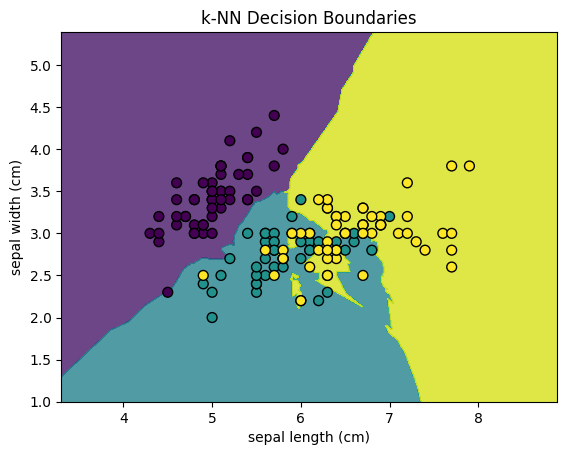

In [ ]:
# Create a mesh grid for our feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict classes for each point in the mesh grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Visualize the decision boundaries
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.title("k-NN Decision Boundaries")
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.show()


### Step 5: Reflection

Reflect on the decision boundaries:
1. How do the boundaries change with different values of `k`?
2. Are there any overlapping regions or areas of ambiguity? What do they signify?
3. How do you think adding more features might impact the decision boundaries?

Experiment with different values of `k` and note your observations.


## **Exercise 7**: Exploring k-NN with Different Feature Scaling Methods

Feature scaling is an essential step in preprocessing, especially for distance-based algorithms like k-NN. In this exercise, we'll investigate the effects of various feature scaling methods on the k-NN classifier using the Iris dataset.


### Step 1: Dataset and Setup

Start by loading the necessary libraries and the Iris dataset. We'll use all features in this exercise to fully appreciate the effects of scaling.


In [ ]:
from sklearn import datasets

# Load iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target


### Step 2: Splitting Data

For training and evaluating our model, we'll split the data into training and testing sets.


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


### Step 3: Applying Feature Scaling

Feature scaling can be performed in several ways:
1. Min-Max Scaling
2. Standard Scaling (Z-score normalization)
3. Robust Scaling

Apply each of these methods to our dataset.


In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Min-Max Scaling
min_max_scaler = ...
X_train_min_max = ...
X_test_min_max = ...

# Standard Scaling
standard_scaler = ...
X_train_standard = ...
X_test_standard = ...

# Robust Scaling
robust_scaler = ...
X_train_robust = ...
X_test_robust = ...


 #### Correction :

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# Min-Max Scaling
min_max_scaler = MinMaxScaler()
X_train_min_max = min_max_scaler.fit_transform(X_train)
X_test_min_max = min_max_scaler.transform(X_test)

# Standard Scaling
standard_scaler = StandardScaler()
X_train_standard = standard_scaler.fit_transform(X_train)
X_test_standard = standard_scaler.transform(X_test)

# Robust Scaling
robust_scaler = RobustScaler()
X_train_robust = robust_scaler.fit_transform(X_train)
X_test_robust = robust_scaler.transform(X_test)


### Step 4: Training k-NN on Scaled Data

Now, train the k-NN classifier on each of the scaled datasets and compare their performances.


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 5

# Train and evaluate on Min-Max scaled data
knn_min_max = ...
y_pred_min_max = ...
accuracy_min_max = ...

# Train and evaluate on Standard scaled data
knn_standard = ...
y_pred_standard = ...
accuracy_standard = ...

# Train and evaluate on Robust scaled data
knn_robust = ...
y_pred_robust = ...
accuracy_robust = ...

print("Accuracy with Min-Max scaling:", ...)
print("Accuracy with Standard scaling:", ...)
print("Accuracy with Robust scaling:", ...)


 #### Correction :

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k = 5

# Train and evaluate on Min-Max scaled data
knn_min_max = KNeighborsClassifier(n_neighbors=k)
knn_min_max.fit(X_train_min_max, y_train)
y_pred_min_max = knn_min_max.predict(X_test_min_max)
accuracy_min_max = accuracy_score(y_test, y_pred_min_max)

# Train and evaluate on Standard scaled data
knn_standard = KNeighborsClassifier(n_neighbors=k)
knn_standard.fit(X_train_standard, y_train)
y_pred_standard = knn_standard.predict(X_test_standard)
accuracy_standard = accuracy_score(y_test, y_pred_standard)

# Train and evaluate on Robust scaled data
knn_robust = KNeighborsClassifier(n_neighbors=k)
knn_robust.fit(X_train_robust, y_train)
y_pred_robust = knn_robust.predict(X_test_robust)
accuracy_robust = accuracy_score(y_test, y_pred_robust)

print("Accuracy with Min-Max scaling:", accuracy_min_max)
print("Accuracy with Standard scaling:", accuracy_standard)
print("Accuracy with Robust scaling:", accuracy_robust)


Accuracy with Min-Max scaling: 1.0
Accuracy with Standard scaling: 1.0
Accuracy with Robust scaling: 0.9555555555555556
